In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
traps = pd.read_csv('train_clean.csv',index_col=0,parse_dates=['Date'])
traps.head()

,Date,Trap,Address,Block,Street,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,RESTUANS,PIPIENS,SALINARIUS,TERRITANS,TARSALIS,ERRATICUS,NumMosquitos,WnvPresent
0,2007-05-29,T002,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,1,0,0,0,0,2,0.0
1,2007-05-29,T007,"6200 North Mandell Avenue, Chicago, IL 60646, USA",62,N MANDELL AVE,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,0,0,0,0,1,0.0
2,2007-05-29,T015,"7900 West Foster Avenue, Chicago, IL 60656, USA",79,W FOSTER AVE,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,1,0,0,0,0,5,0.0
3,2007-05-29,T045,"1500 West Webster Avenue, Chicago, IL 60614, USA",15,W WEBSTER AVE,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,1,0,0,0,0,0,2,0.0
4,2007-05-29,T046,"2500 West Grand Avenue, Chicago, IL 60654, USA",25,W GRAND AVE,"2500 W GRAND AVE, Chicago, IL",41.891118,-87.654491,8,1,0,0,0,0,0,1,0.0


In [38]:
traps.set_index('Date',drop=True,inplace=True)
traps07 = traps.loc['2007']

In [39]:
traps07.Trap.nunique()

116

In [40]:
traps07 =traps07.reset_index()

In [41]:
traps07['Week'] = traps07['Date'].dt.week


C:\Users\blain\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [42]:
traps07 = traps07.groupby(['Trap','Week']).count()[['Date']]

In [43]:
traps07

Date
Trap Week      
T001 26       1
     28       1
     29       1
     31       1
     32       1
...         ...
T221 36       1
     37       1
     38       1
     39       1
     41       1

[1286 rows x 1 columns]

In [44]:
traps07.Date.value_counts()

1    1116
2     167
3       3
Name: Date, dtype: int64

In [45]:
traps07.reset_index()

,Trap,Week,Date
0,T001,26,1
1,T001,28,1
2,T001,29,1
3,T001,31,1
4,T001,32,1
...,...,...,...
1281,T221,36,1
1282,T221,37,1
1283,T221,38,1
1284,T221,39,1


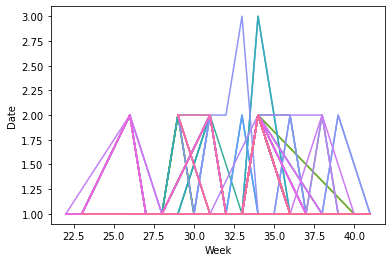

In [46]:
sns.lineplot(data=traps07.reset_index(),x='Week',y='Date',hue='Trap')
plt.legend().remove()

plt.show()

In [47]:
weather = pd.read_csv('weather_clean.csv',index_col = 0, parse_dates=['Date'])
weather.set_index('Date',drop=False,inplace=True)
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2944 entries, 2007-05-01 to 2014-10-31
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Station         2944 non-null   int64         
 1   Date            2944 non-null   datetime64[ns]
 2   Tmax            2944 non-null   int64         
 3   Tmin            2944 non-null   int64         
 4   Tavg            2944 non-null   int64         
 5   Depart          2944 non-null   float64       
 6   DewPoint        2944 non-null   int64         
 7   WetBulb         2944 non-null   int64         
 8   Heat            2944 non-null   int64         
 9   Cool            2944 non-null   int64         
 10  CodeSum         2944 non-null   object        
 11  PrecipTotal     2944 non-null   float64       
 12  StnPressure     2944 non-null   float64       
 13  SeaLevel        2944 non-null   float64       
 14  AvgSpeed        2944 non-null   float6

In [48]:
years = ['2007','2009','2011','2013']
weather = pd.concat([weather.loc[y] for y in years])

In [49]:
weather['Year'] = weather.index.year
weather['Day'] = weather.index.dayofyear
weather['Week'] = weather.index.week

C:\Users\blain\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  This is separate from the ipykernel package so we can avoid doing imports until


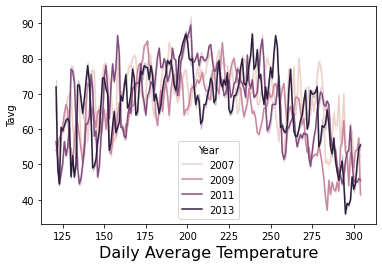

In [50]:
sns.lineplot(data=weather, x='Day',y='Tavg',hue='Year')
plt.xlabel('Daily Average Temperature',fontsize=16)
plt.show()

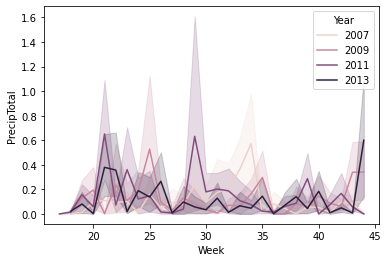

In [51]:
sns.lineplot(data=weather, x='Week',y='PrecipTotal',hue='Year')

plt.show()

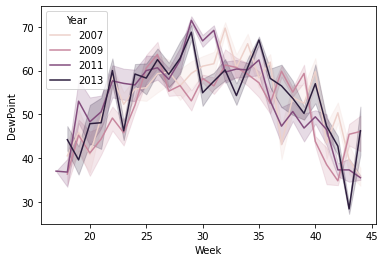

In [52]:
sns.lineplot(data=weather, x='Week',y='DewPoint',hue='Year')

plt.show()

In [66]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1472 entries, 2007-05-01 to 2013-10-31
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Station         1472 non-null   object        
 1   Date            1472 non-null   datetime64[ns]
 2   Tmax            1472 non-null   int64         
 3   Tmin            1472 non-null   int64         
 4   Tavg            1472 non-null   int64         
 5   Depart          1472 non-null   float64       
 6   DewPoint        1472 non-null   int64         
 7   WetBulb         1472 non-null   int64         
 8   Heat            1472 non-null   int64         
 9   Cool            1472 non-null   int64         
 10  CodeSum         1472 non-null   object        
 11  PrecipTotal     1472 non-null   float64       
 12  StnPressure     1472 non-null   float64       
 13  SeaLevel        1472 non-null   float64       
 14  AvgSpeed        1472 non-null   float6

In [60]:
weather['Station'] = weather.Station.astype('object')

In [63]:
weather['Station'].value_counts()

1    736
2    736
Name: Station, dtype: int64

In [61]:
varz = 'Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,PrecipTotal,StnPressure,WindSpeed,Sunrise(hrs),Sunset(hrs)'

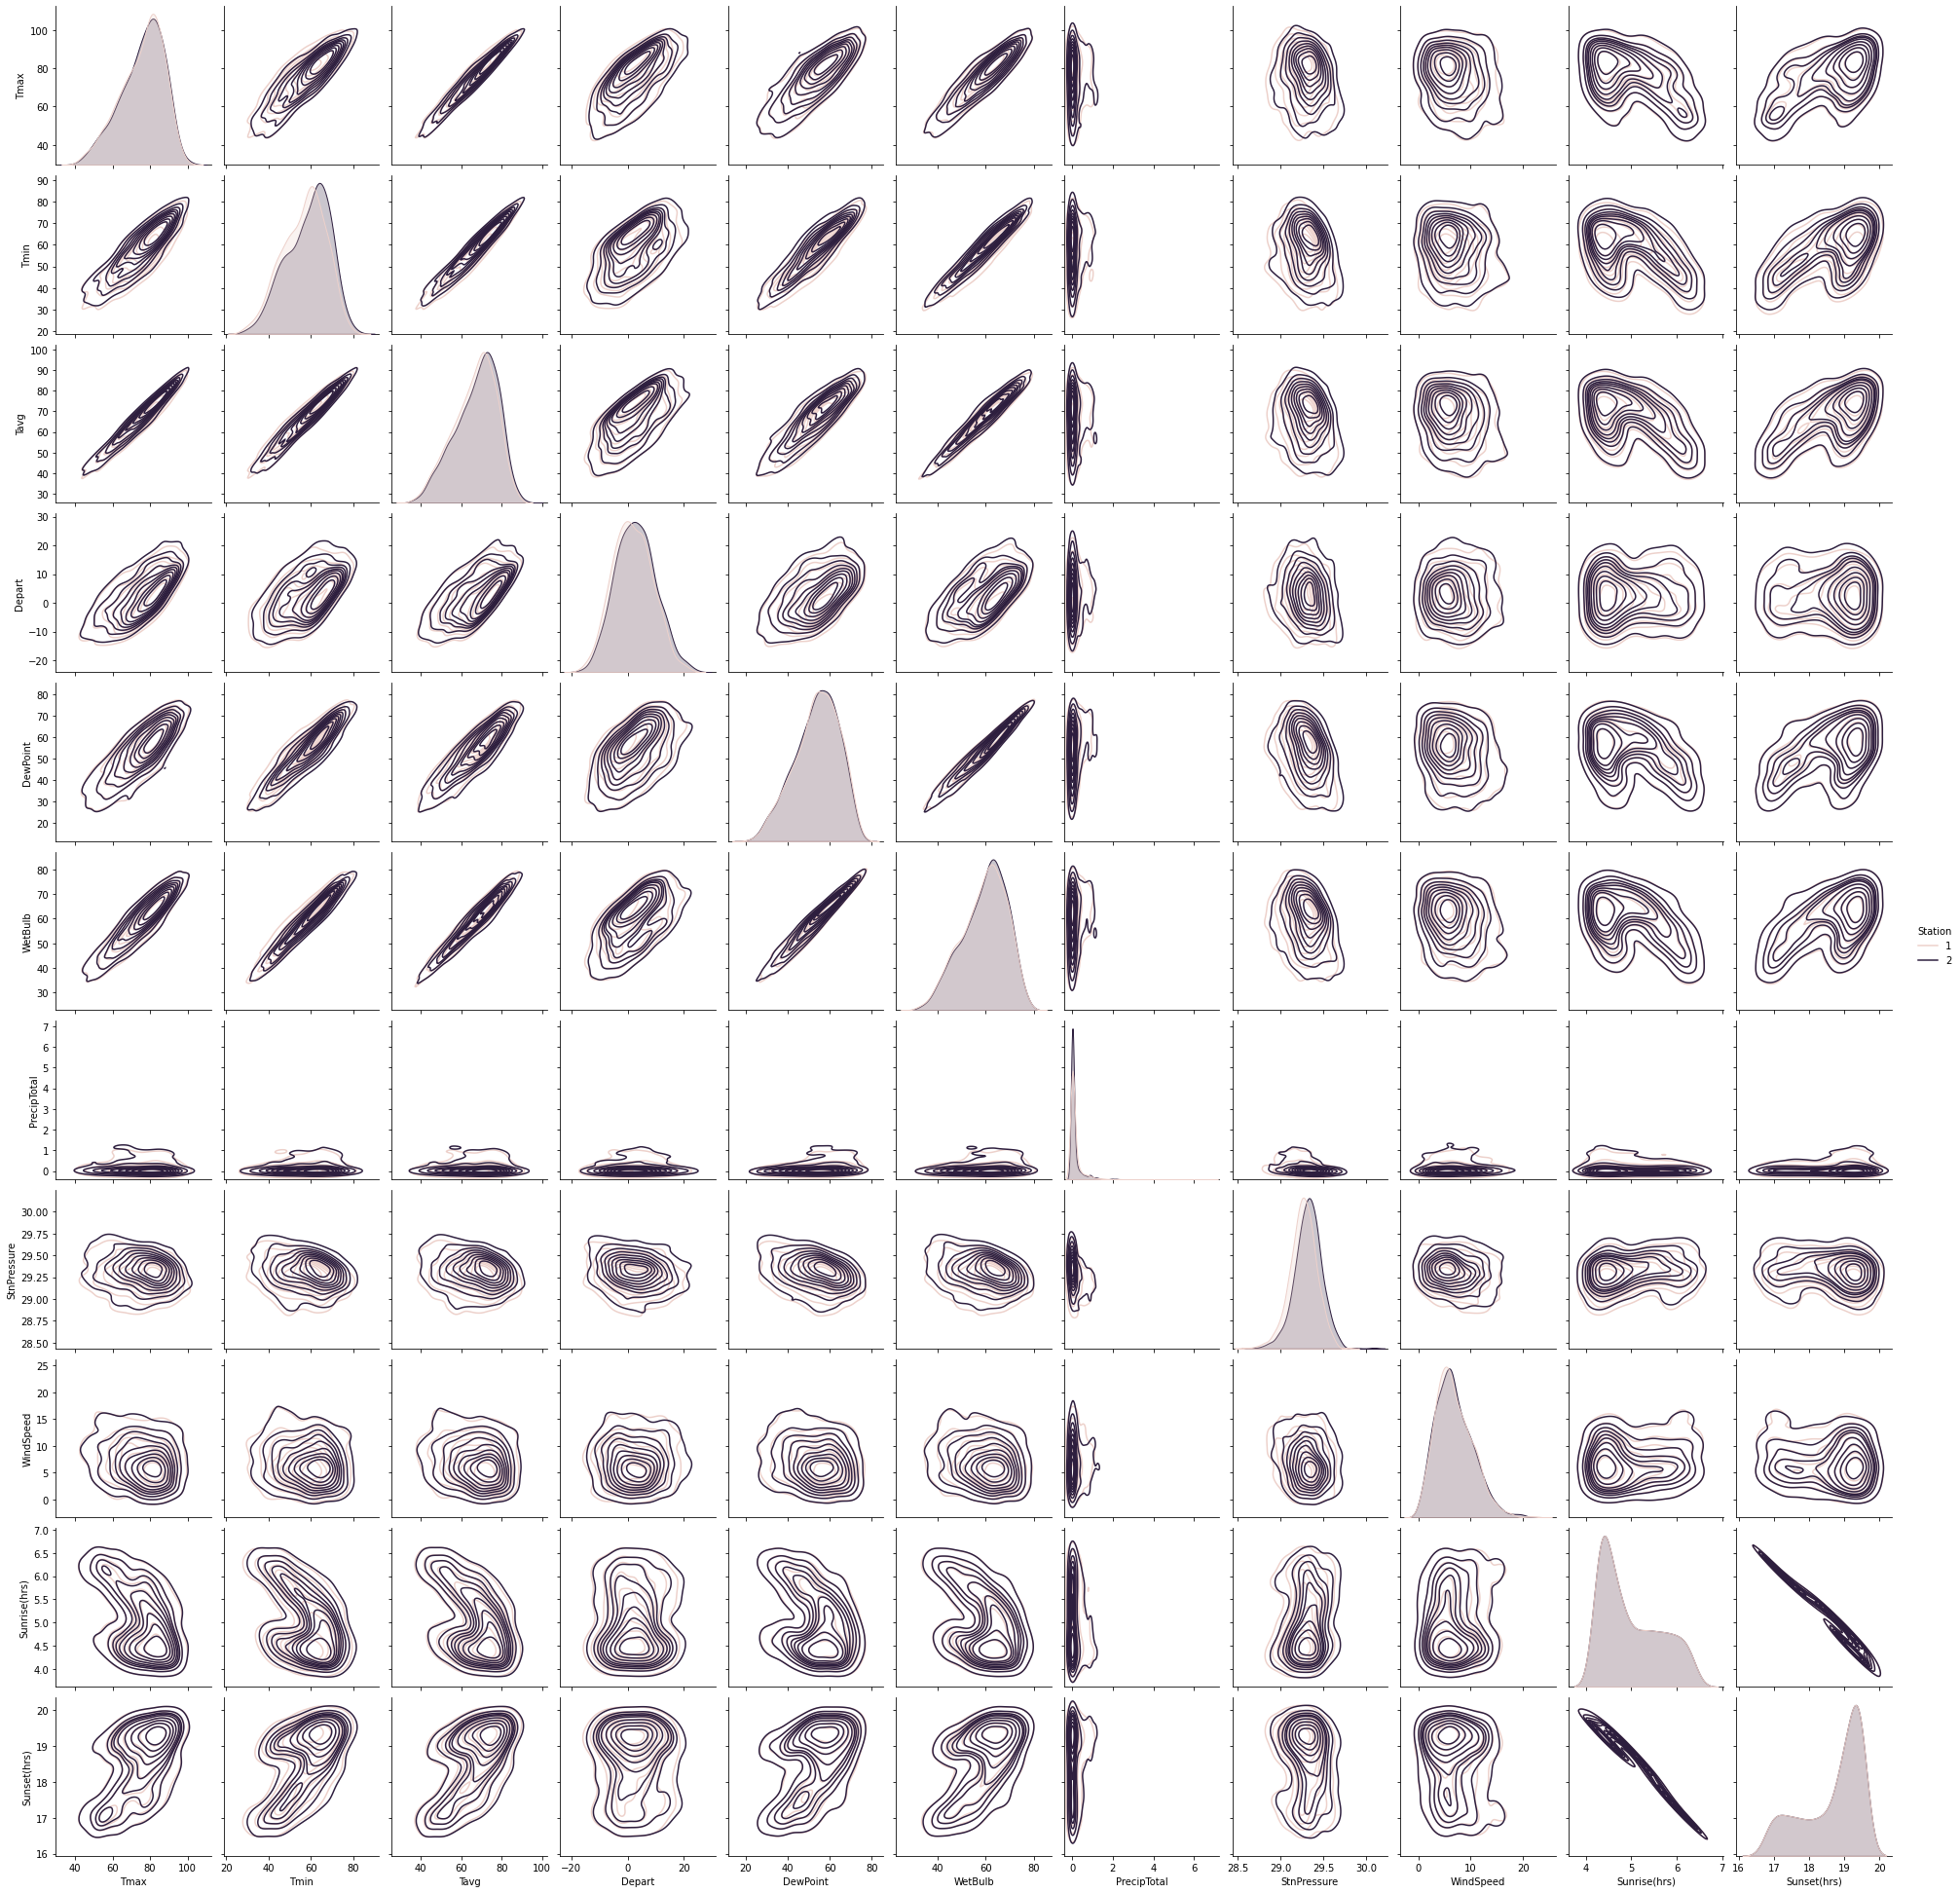

In [69]:
sns.pairplot(data=weather,hue='Station',vars=varz.split(','),kind='kde')

plt.show()

In [6]:
origtrain = pd.read_csv('../input/train.csv')

In [7]:
origtrain

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10501,2013-09-26,"5100 West 72nd Street, Chicago, IL 60638, USA",CULEX PIPIENS/RESTUANS,51,W 72ND ST,T035,"5100 W 72ND ST, Chicago, IL",41.763733,-87.742302,8,6,1
10502,2013-09-26,"5800 North Ridge Avenue, Chicago, IL 60660, USA",CULEX PIPIENS/RESTUANS,58,N RIDGE AVE,T231,"5800 N RIDGE AVE, Chicago, IL",41.987280,-87.666066,8,5,0
10503,2013-09-26,"1700 North Ashland Avenue, Chicago, IL 60622, USA",CULEX PIPIENS/RESTUANS,17,N ASHLAND AVE,T232,"1700 N ASHLAND AVE, Chicago, IL",41.912563,-87.668055,9,1,0
10504,2013-09-26,"7100 North Harlem Avenue, Chicago, IL 60631, USA",CULEX PIPIENS/RESTUANS,71,N HARLEM AVE,T233,"7100 N HARLEM AVE, Chicago, IL",42.009876,-87.807277,9,5,0


<AxesSubplot:>

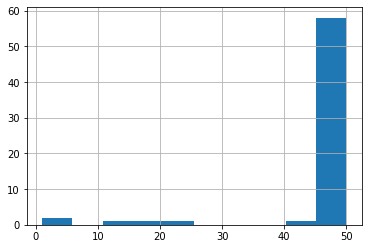

In [11]:
origtrain[(origtrain.Date=='2007-07-25') & (origtrain.Trap=='T115')]['NumMosquitos'].hist()

In [19]:
trainclean = pd.read_csv('train_clean.csv')
trainclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4616 entries, 0 to 4615
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              4616 non-null   int64  
 1   Date                    4616 non-null   object 
 2   Trap                    4616 non-null   object 
 3   Address                 4616 non-null   object 
 4   Block                   4616 non-null   int64  
 5   Street                  4616 non-null   object 
 6   AddressNumberAndStreet  4616 non-null   object 
 7   Latitude                4616 non-null   float64
 8   Longitude               4616 non-null   float64
 9   AddressAccuracy         4616 non-null   int64  
 10  RESTUANS                4616 non-null   int64  
 11  PIPIENS                 4616 non-null   int64  
 12  SALINARIUS              4616 non-null   int64  
 13  TERRITANS               4616 non-null   int64  
 14  TARSALIS                4616 non-null   

<AxesSubplot:>

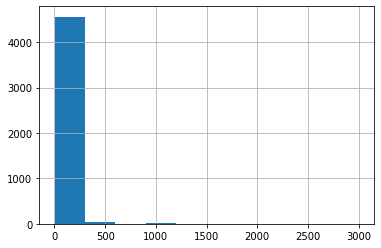

In [13]:
trainclean.NumMosquitos.hist()

In [20]:
trainweather = pd.read_csv('train_w_aggregated_weather.csv',index_col=0)

In [34]:
trainweather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4616 entries, 0 to 4615
Columns: 110 entries, Date to Daylight
dtypes: float64(82), int64(22), object(6)
memory usage: 3.9+ MB


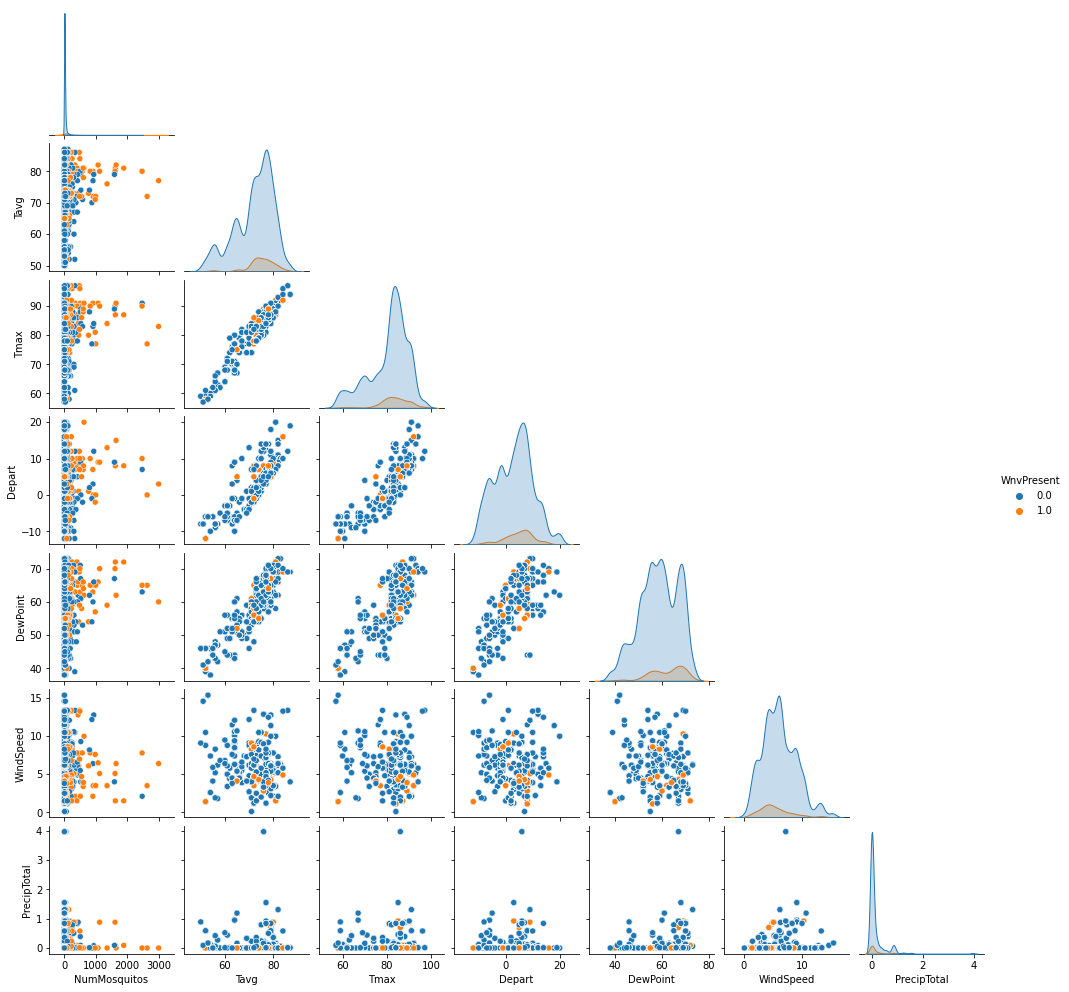

In [35]:
varz = ['NumMosquitos','Tavg','Tmax','Depart','DewPoint','WindSpeed','PrecipTotal']

sns.pairplot(data=trainweather,vars=varz, corner=True, hue='WnvPresent',height=2)
#plt.legend(labels=['Negative','Positive'],loc='upper right',fontsize=30)
plt.show()